In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
#data = pd.read_excel("/kaggle/input/arketing-campaign/marketing_campaign.xlsx")
data =  pd.read_csv('./ml_project1_data.csv', sep=',')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## **EDA**

In [4]:
# Missing data
def missing_rep(df):
    miss = df.isna().sum()
    miss = miss[miss>0]
    miss_p = miss/df.shape[0]
    miss_t = miss_p>0.03

    return pd.DataFrame({"Missings" : miss, "Proportion of Missings" : miss_p, "Higher than 3%" : miss_t})


missing_rep(data)

,Missings,Proportion of Missings,Higher than 3%
Income,24,0.010714,False


In [5]:
def highlight_above_threshold(val):
    if val < .15:
        color = 'red'
    else:
        color = 'black'
    #color = 'red' if val < .15 else 'black'
    return 'color: %s' % color

In [6]:
feat_c = ["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
         "AcceptedCmp5", "Complain"]

# Categorical features analysis
def cat_feat_describe(df, fc, target, n, thresh):

    fl = []
    if (type(fc)==list):
    
        for feature in fc:
            fl.append(df.groupby([feature]).agg({target : ["count", "mean"]}))    

            fm = pd.concat(fl, keys=fc)

            fm = pd.DataFrame({"Number of observations" : fm.iloc[:,0], "Discrimination ability" : fm.iloc[:,1],
                                 "More than n observations" : fm.iloc[:,0]>n})
    else:
        fm = (df.groupby(fc).agg({target : ["count", "mean"]}))
        
        fm = pd.DataFrame({"Number of observations" : fm.iloc[:,0], "Discrimination ability" : fm.iloc[:,1],
                                 "More than n observations" : fm.iloc[:,0]>n})
        
    return fm


feat_sum = cat_feat_describe(data, feat_c, "Response", 40, 0.15)
feat_sum.style.applymap(highlight_above_threshold)

In [7]:
data_ = data.copy()

low_discriminability_cat = ["Absurd", "Alone", "YOLO", "Married", "Together"]
data_['Marital_Status'].loc[data_['Marital_Status'].isin(low_discriminability_cat)] = 'Other'
data_.groupby("Marital_Status").count().index

/home/charles/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Index(['Divorced', 'Other', 'Single', 'Widow'], dtype='object', name='Marital_Status')

In [8]:
low_discriminability_cat = ["Graduation", "2n Cycle", "Basic"]
data_['Education'].loc[data_['Education'].isin(low_discriminability_cat)] = 'Other'
data_.groupby("Education").count().index

Index(['Master', 'Other', 'PhD'], dtype='object', name='Education')

In [9]:
data_['NumberOff'] = data_['Kidhome'] + data_['Teenhome']
feat_c.append("NumberOff")

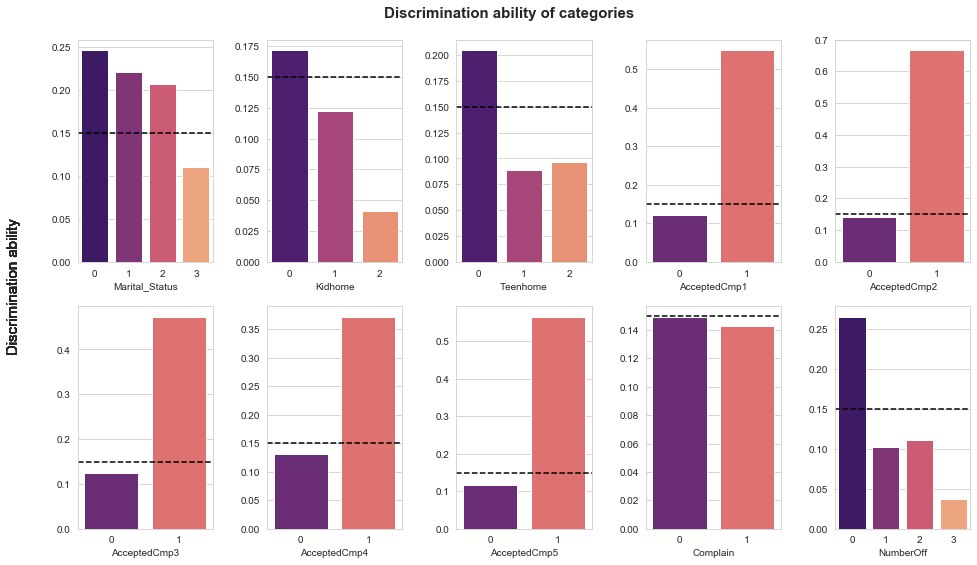

In [10]:
def cat_feat_plot(df, fc, target, thresh):

    sns.set_style("whitegrid")    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.4)
    i=1
    
    for feat in fc:
        plot_df = cat_feat_describe(df, feat, target, 50, thresh).iloc[:,1]
        plot_df = plot_df.sort_values(ascending=False)
        plot_df = pd.DataFrame(plot_df)
        plot_df = pd.DataFrame(plot_df.reset_index())
        ax =sns.barplot(plot_df[feat], plot_df['Discrimination ability'], palette='magma')
        ax.set_ylabel("", size = 10)
        ax.axhline(y=thresh, color="black", ls='--')
        ax.set_xticklabels(plot_df.index, size=10)
        
        if i<11:
            plt.subplot(2, 5, i)
            i+=1
        
        fig.suptitle('Discrimination ability of categories', ha='center',
                     va='center', fontsize=15, y=0.92, fontweight='bold')
        fig.yaxis_title='Discrimination ability'
        fig.text(0.07, 0.5,'Discrimination ability', ha='center', va='center',
                 rotation='vertical', fontsize=15)
        fig.set_figheight(9)
        fig.set_figwidth(16)
        
cat_feat_plot(data_, feat_c, "Response", 0.15)

#### Transforms date format in days

In [11]:
def days_since(dates_series, date_format):
    n = len(dates_series)
    result = [0] * n

    for i in range(n):
        result[i] = (datetime.today()-datetime.strptime(dates_series[i], date_format)).days
    
    return result

data_["Days_Customer"] = days_since(list(data_.Dt_Customer), "%Y-%m-%d")
data_ = data_.drop(columns="Dt_Customer")
data_["Days_Customer"].head()

0    2878
1    2328
2    2527
3    2354
4    2376
Name: Days_Customer, dtype: int64

#### Describes numerical attributes

In [12]:
feat_n = list(data_.columns)
feat_n = list(filter(lambda x: x not in feat_c, feat_n))

feat_n.remove("ID") # Removing ID column

data_[feat_n].describe() # Describing only Numerical Variables

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Response,Days_Customer
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0,0.149107,2568.582143
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0,0.356274,202.122512
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2215.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,0.000000,2395.750000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,0.000000,2570.500000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,0.000000,2744.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,1.000000,2914.000000


#### Drops constant variables

In [13]:
std = data_[feat_n].describe().iloc[2,:]
const_lab = [std[std<0.05].index[0], std[std<0.05].index[1]]
std[std<0.05]

Z_CostContact    0.0
Z_Revenue        0.0
Name: std, dtype: float64

In [14]:
data_.drop(labels=const_lab, axis=1, inplace=True)
feat_n = list(filter(lambda x: x not in const_lab, feat_n))

#### Removes inconsistant age

In [15]:
data_[(2020 - data_["Year_Birth"])>90]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer
192,7829,1900,Other,Divorced,36640.0,1,0,99,15,6,...,5,0,0,0,0,0,1,0,1,2491
239,11004,1893,Other,Single,60182.0,0,1,23,8,0,...,4,0,0,0,0,0,0,0,1,2258
339,1150,1899,PhD,Other,83532.0,0,0,36,755,144,...,1,0,0,1,0,0,0,0,0,2491


In [16]:
data_ = data_[(2020 - data_["Year_Birth"])<=90]

#### Drops rows with less missing *income* (about 1% of the data)

In [17]:
data_ = data_[~data_['Income'].isna()]
data_.shape

(2213, 28)

#### Correlation matrix

In [18]:
# The function to "zoom" in the correlation matrix.
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]

def corr_matrix(df):
    # Compute the correlation matrix
    corr = df.corr()
    cmap = sns.diverging_palette(5, 250, as_cmap=True)
    
    vis = corr.style.background_gradient(cmap, axis=1)\
            .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
            .set_caption("Hover to magify")\
            .set_precision(2)\
            .set_table_styles(magnify())

    return vis

feat_n_ = feat_n.copy()
feat_n.remove("Response") # Removing the Targer variable from the list of numerical features to be analyzed by correlation.
corr_matrix(data_[feat_n])

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer
Year_Birth,1.00,-0.16,-0.02,-0.16,-0.01,-0.03,-0.04,-0.02,-0.06,-0.07,-0.16,-0.13,-0.14,0.12,0.01
Income,-0.16,1.00,-0.00,0.58,0.43,0.58,0.44,0.44,0.33,-0.08,0.39,0.59,0.53,-0.55,-0.02
Recency,-0.02,-0.00,1.00,0.02,-0.01,0.02,0.00,0.03,0.02,0.00,-0.01,0.02,-0.00,-0.02,0.03
MntWines,-0.16,0.58,0.02,1.00,0.39,0.57,0.40,0.39,0.39,0.01,0.55,0.63,0.64,-0.32,0.17
MntFruits,-0.01,0.43,-0.01,0.39,1.00,0.55,0.59,0.57,0.39,-0.13,0.30,0.49,0.46,-0.42,0.07
MntMeatProducts,-0.03,0.58,0.02,0.57,0.55,1.00,0.57,0.53,0.36,-0.12,0.31,0.73,0.49,-0.54,0.09
MntFishProducts,-0.04,0.44,0.00,0.40,0.59,0.57,1.00,0.58,0.43,-0.14,0.30,0.53,0.46,-0.45,0.08
MntSweetProducts,-0.02,0.44,0.03,0.39,0.57,0.53,0.58,1.00,0.36,-0.12,0.33,0.49,0.46,-0.42,0.08
MntGoldProds,-0.06,0.33,0.02,0.39,0.39,0.36,0.43,0.36,1.00,0.05,0.41,0.44,0.39,-0.25,0.16
NumDealsPurchases,-0.07,-0.08,0.00,0.01,-0.13,-0.12,-0.14,-0.12,0.05,1.00,0.24,-0.01,0.07,0.35,0.22


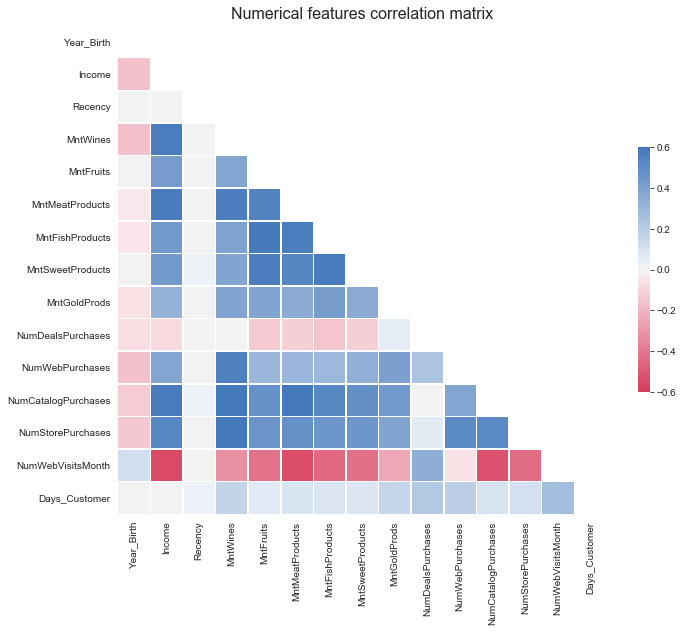

In [19]:
corr = data_[feat_n].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(11,9))

cmap = sns.diverging_palette(5, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, vmin=-.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Numerical features correlation matrix", fontsize=16)
plt.show()

#### Distribution according to response

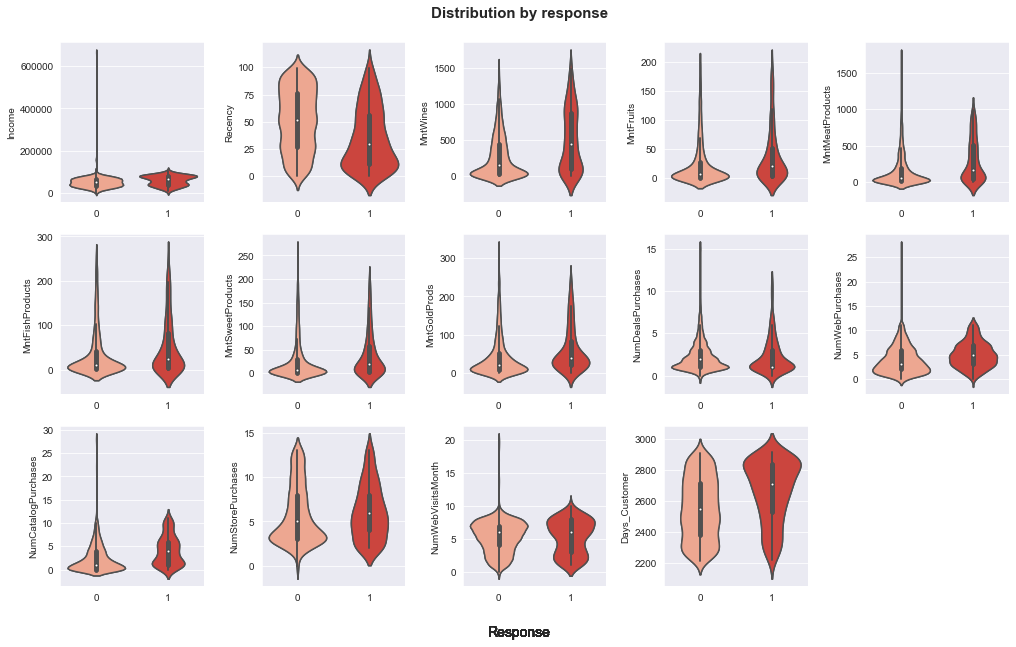

In [20]:
def num_feat_plot(df, feat_nlist, target, feat_clist = None):
    
    sns.set_style("darkgrid")    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.4)
    i=1
    
    if(target in feat_nlist):
        feat_nl = feat_nlist.copy()
        feat_nl.remove(target)

    
    for feat in feat_nl:
        sns.violinplot(data = df, y = feat, x = target)
        ax=sns.violinplot(data = df, y = feat, x = target, palette="Reds")
        ax.set_xlabel("", size = 10)
        
        if i<15:
            plt.subplot(3, 5, i)
            i+=1
        
        fig.suptitle('Distribution by response', ha='center',
                     va='center', fontsize=15, y=0.92, fontweight='bold')
        fig.text(0.5, 0.06, 'Response', ha='center', va='center', fontsize=14)
        fig.set_figheight(10)
        fig.set_figwidth(17)

    return

num_feat_plot(data_, feat_n_, "Response")

#### Outlier detection

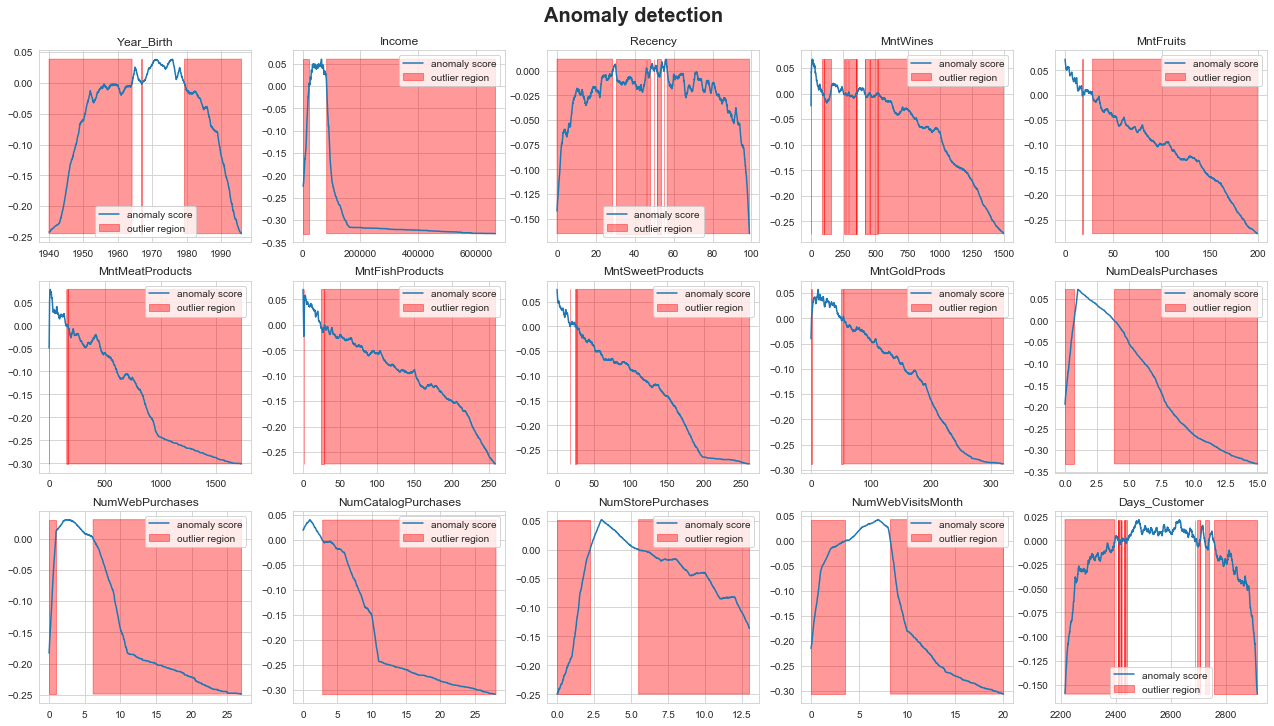

In [21]:
from sklearn.ensemble import IsolationForest

def anom_plot(df, num_feat_list, l, c):
    sns.set_style("whitegrid") 
    fig, axs = plt.subplots(l, c, figsize=(22, 12), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    for i, column in enumerate(num_feat_list):
        isolation_forest = IsolationForest(n_estimators=500, contamination="auto")
        isolation_forest.fit(df[column].values.reshape(-1,1))

        xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
        anomaly_score = isolation_forest.decision_function(xx)
        outlier = isolation_forest.predict(xx)
    
        axs[i].plot(xx, anomaly_score, label='anomaly score')
        axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
        axs[i].legend()
        axs[i].set_title(column)
        
    fig.suptitle('Anomaly detection', ha='center',
                     va='center', fontsize=20, y=0.92, fontweight='bold')
        
    return
    
anom_plot(data_, feat_n, 3, 5)

The following cell defines two utility functions to semi-automatically identify outliers, through univariate perspective, in a pandas.Series using standard deviation from the mean (filter_by_std) and interquartile range (filter_by_iqr).

In [22]:
def filter_by_iqr(series_, k=1.5, return_thresholds=False):
    q25, q75 = np.percentile(series_, 25), np.percentile(series_, 75)
    iqr = q75-q25
    
    cutoff = iqr*k
    lower_bound, upper_bound = q25-cutoff, q75+cutoff
    
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]

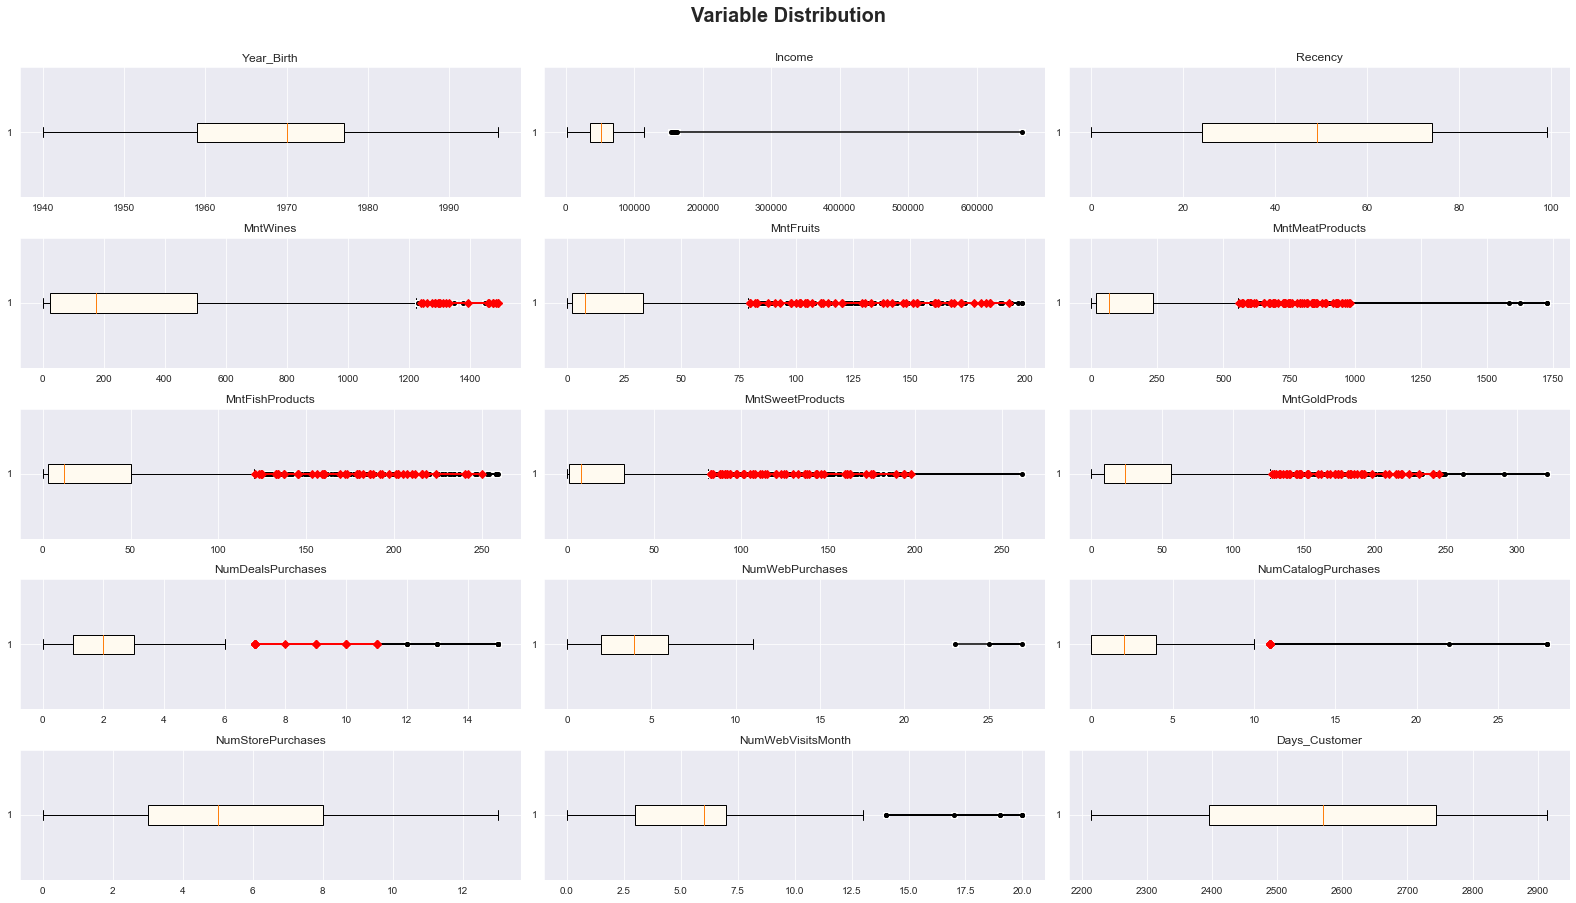

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

def bivariate_outlier_id_plot(df, list_num_features, target, n_bins=20):
    sns.set_style("darkgrid") 
    fig = plt.figure(figsize=(22, 12))
    color = "floralwhite"
    i=1
    for feature in list_num_features:
        if feature == "Income":
            ser = df[feature].copy()
            ser.dropna(inplace=True)
        else:
            ser = df[feature]
          
        # box plots
        thresholds = filter_by_iqr(ser, 1.5, True)
        outliers = df[[feature, target]][df[feature]>thresholds[1]]

        ax = fig.add_subplot(5, 3, i)

        box = ax.boxplot(ser, flierprops=dict(markerfacecolor='r', marker='s'), 
                         vert=False, patch_artist=True, sym="w")                                                                  
        ax.plot(outliers.iloc[:, 0][outliers.iloc[:, 1]==0], np.ones(sum(outliers.iloc[:, 1]==0)), color="black", marker = "o", markersize=4)
        ax.plot(outliers.iloc[:, 0][outliers.iloc[:, 1]==1], np.ones(sum(outliers.iloc[:, 1]==1)), color="red", marker = "D", markersize=6)
        ax.set_title(feature)
        box['boxes'][0].set_facecolor(color)

        i+=1
        
    fig.suptitle('Variable Distribution',  ha='center',
                     va='center', fontsize=20, y=1.03, fontweight='bold')

    plt.tight_layout()
    plt.show()

bivariate_outlier_id_plot(data_, feat_n, "Response", n_bins=20)

## **Split dataset**

In [24]:
seeds = [4, 56, 92, 105, 400]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_,
                                                    data_["Response"],
                                                    test_size=0.3,
                                                    random_state=seeds[0])

#### Multivariate outlier detection

In [26]:
# Simple function to check if the matrix is positive definite 
#(for example, it will return False if the matrix contains NaN).
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False 

# The function to calculate the Mahalanobis Distance. Returns a list of distances.
def MahalanobisDist(data):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(data.shape[0]):
                vars_mean.append(list(data.mean(axis=0)))
            diff = data - vars_mean
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
            return md
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
        
def MD_detectOutliers(data, extreme=False):
    MD = MahalanobisDist(data)

    std = np.std(MD)
    k = 3. * std if extreme else 2. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [27]:
data_aux = X_train[feat_n_]
outliers_i = MD_detectOutliers(np.array(data_aux))
len(outliers_i)

36

In [28]:
outliers = pd.DataFrame()
for i in outliers_i:
    outliers = outliers.append(data_aux.iloc[i,:])
    
outliers.head()

,Days_Customer,Income,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Year_Birth
914,2788.0,95529.0,250.0,29.0,24.0,890.0,27.0,770.0,3.0,1.0,7.0,7.0,3.0,29.0,1.0,1994.0
1743,2744.0,70321.0,82.0,23.0,191.0,751.0,26.0,303.0,5.0,1.0,13.0,6.0,4.0,6.0,1.0,1947.0
1946,2819.0,63211.0,205.0,193.0,145.0,459.0,26.0,145.0,8.0,2.0,7.0,3.0,2.0,3.0,1.0,1982.0
203,2819.0,102160.0,76.0,29.0,58.0,138.0,176.0,763.0,9.0,0.0,10.0,7.0,4.0,54.0,1.0,1977.0
855,2669.0,60474.0,234.0,199.0,170.0,303.0,9.0,265.0,2.0,7.0,12.0,10.0,7.0,25.0,0.0,1979.0


Drops the outliers

In [29]:
X_train = X_train[~X_train.index.isin(outliers.index)]
y_train = y_train[~y_train.index.isin(outliers.index)]

## **Feature Engineering**

Business-oriented features

In [30]:
# Percentage of Monetary Units spent on gold products out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = X_train["MntGoldProds"].iloc[i]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
    
X_train["PrpGoldProds"] = aux
X_train["PrpGoldProds"].head()

1378    0.080537
1580    0.071429
1047    0.008985
769     0.147959
1340    0.049180
Name: PrpGoldProds, dtype: float64

In [31]:
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = X_test["MntGoldProds"].iloc[i]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
    
X_test["PrpGoldProds"] = aux
X_test["PrpGoldProds"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.124874
1968    0.038517
288     0.019310
945     0.029654
1359    0.100840
Name: PrpGoldProds, dtype: float64

In [32]:
# Number of Accepted Campaigns out of the last 5 Campaigns
aux = [0]* X_train.shape[0]


for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])
    
    
X_train["NmbAccCmps"] = aux
X_train["NmbAccCmps"].head()

1378    1
1580    0
1047    0
769     0
1340    1
Name: NmbAccCmps, dtype: int64

In [33]:
# Number of Accepted Campaigns out of the last 5 Campaigns
aux = [0]* X_test.shape[0]


for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])
    
    
X_test["NmbAccCmps"] = aux
X_test["NmbAccCmps"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


168     0
1968    1
288     0
945     2
1359    0
Name: NmbAccCmps, dtype: int64

In [34]:
# Proportion of Accepted Campaigns out of the last 5 Campaigns
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])/5
    
X_train["PrpAccCmps"] = aux
X_train["PrpAccCmps"].head()

1378    0.2
1580    0.0
1047    0.0
769     0.0
1340    0.2
Name: PrpAccCmps, dtype: float64

In [35]:
# Proportion of Accepted Campaigns out of the last 5 Campaigns
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])/5
    
X_test["PrpAccCmps"] = aux
X_test["PrpAccCmps"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.0
1968    0.2
288     0.0
945     0.4
1359    0.0
Name: PrpAccCmps, dtype: float64

In [36]:
# Proportion of Monetary Units spent on Wine out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntWines"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PrpWines"] = aux
X_train["PrpWines"].head()

1378    0.939597
1580    0.571429
1047    0.415993
769     0.767857
1340    0.898361
Name: PrpWines, dtype: float64

In [37]:
# Proportion of Monetary Units spent on Wine out of the total spent
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntWines"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PrpWines"] = aux
X_test["PrpWines"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.278953
1968    0.382267
288     0.272414
945     0.960461
1359    0.663866
Name: PrpWines, dtype: float64

In [38]:
# Proportion of Monetary Units spent on Fruits out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntFruits"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PrpFruits"] = aux
X_train["PrpFruits"].head()

1378    0.000000
1580    0.071429
1047    0.086253
769     0.017857
1340    0.000000
Name: PrpFruits, dtype: float64

In [39]:
# Proportion of Monetary Units spent on Fruits out of the total spent
aux = [0]* X_test.shape[0]


for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntFruits"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PrpFruits"] = aux
X_test["PrpFruits"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


168     0.163142
1968    0.058140
288     0.126207
945     0.000000
1359    0.008403
Name: PrpFruits, dtype: float64

In [40]:
# Proportion of Monetary Units spent on Meat out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntMeatProducts"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PrpMeat"] = aux
X_train["PrpMeat"].head()

1378    0.060403
1580    0.357143
1047    0.299191
769     0.188776
1340    0.068852
Name: PrpMeat, dtype: float64

In [41]:
# Proportion of Monetary Units spent on Meat out of the total spent
aux = [0]* X_test.shape[0]


for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntMeatProducts"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PrpMeat"] = aux
X_test["PrpMeat"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


168     0.307150
1968    0.401890
288     0.389655
945     0.039539
1359    0.260504
Name: PrpMeat, dtype: float64

In [42]:
# Proportion of Monetary Units spent on Fish out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntFishProducts"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PrpFish"] = aux
X_train["PrpFish"].head()

1378    0.000000
1580    0.000000
1047    0.150943
769     0.025510
1340    0.013115
Name: PrpFish, dtype: float64

In [43]:
# Proportion of Monetary Units spent on Fish out of the total spent
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntFishProducts"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PrpFish"] = aux
X_test["PrpFish"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.174220
1968    0.089390
288     0.114483
945     0.000000
1359    0.033613
Name: PrpFish, dtype: float64

In [44]:
# Monetary
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
X_train["Mnt"] = aux
X_train["Mnt"].head()

1378     298
1580      14
1047    1113
769      392
1340     305
Name: Mnt, dtype: int64

In [45]:
# Monetary
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
X_test["Mnt"] = aux
X_test["Mnt"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168      993
1968    1376
288     1450
945     1214
1359     119
Name: Mnt, dtype: int64

In [46]:
# Buy Potential
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])/((X_train[["Income"]].iloc[i,:])*2))   
    
X_train["BuyPot"] = aux
X_train["BuyPot"].head()

1378    0.002595
1580    0.000202
1047    0.007224
769     0.003158
1340    0.003042
Name: BuyPot, dtype: float64

In [47]:
# Buy Potential
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])/((X_test[["Income"]].iloc[i,:])*2))
    
X_test["BuyPot"] = aux
X_test["BuyPot"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.007416
1968    0.009471
288     0.009069
945     0.011772
1359    0.001786
Name: BuyPot, dtype: float64

In [48]:
# Frequency
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].iloc[i,:])
    
X_train["Freq"] = aux
X_train["Freq"].head()

1378    15
1580     4
1047    27
769     18
1340    13
Name: Freq, dtype: int64

In [49]:
# Frequency
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].iloc[i,:])
    
X_test["Freq"] = aux
X_test["Freq"].head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     15
1968    21
288     22
945     19
1359    10
Name: Freq, dtype: int64

In [50]:
# Creating RFM feature using Recency, Freq and Mnt:
feature_list, n_bins = ["Recency", "Freq", "Mnt"], 5
rfb_dict = {}
for feature in feature_list:
    bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
    feature_bin = bindisc.fit_transform(X_train[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=X_train.index)
    feature_bin += 1
    
    if feature == "Recency":
        feature_bin = feature_bin.sub(5).abs() + 1
    rfb_dict[feature+"_bin"] = feature_bin.astype(int).astype(str)

X_train["RFM"] = (rfb_dict['Recency_bin'] + rfb_dict['Freq_bin'] + rfb_dict['Mnt_bin']).astype(int)
X_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NmbAccCmps,PrpAccCmps,PrpWines,PrpFruits,PrpMeat,PrpFish,Mnt,BuyPot,Freq,RFM
1378,8773,1971,Master,Other,57420.0,0,1,22,280,0,...,1,0.2,0.939597,0.000000,0.060403,0.000000,298,0.002595,15,433
1580,3790,1956,Other,Other,34633.0,2,1,31,8,1,...,0,0.0,0.571429,0.071429,0.357143,0.000000,14,0.000202,4,411
1047,4002,1960,PhD,Other,77037.0,0,1,3,463,96,...,0,0.0,0.415993,0.086253,0.299191,0.150943,1113,0.007224,27,555
769,8786,1956,Master,Other,62058.0,0,1,52,301,7,...,0,0.0,0.767857,0.017857,0.188776,0.025510,392,0.003158,18,343
1340,9386,1962,Other,Other,50127.0,0,1,88,274,0,...,1,0.2,0.898361,0.000000,0.068852,0.013115,305,0.003042,13,133


In [51]:
# Creating RFM feature using Recency, Freq and Mnt:
feature_list, n_bins = ["Recency", "Freq", "Mnt"], 5
rfb_dict = {}
for feature in feature_list:
    bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
    feature_bin = bindisc.fit_transform(X_test[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=X_test.index)
    feature_bin += 1
    
    if feature == "Recency":
        feature_bin = feature_bin.sub(5).abs() + 1
    rfb_dict[feature+"_bin"] = feature_bin.astype(int).astype(str)

X_test["RFM"] = (rfb_dict['Recency_bin'] + rfb_dict['Freq_bin'] + rfb_dict['Mnt_bin']).astype(int)
X_test.head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NmbAccCmps,PrpAccCmps,PrpWines,PrpFruits,PrpMeat,PrpFish,Mnt,BuyPot,Freq,RFM
168,6637,1988,Other,Single,66951.0,0,0,46,277,162,...,0,0.0,0.278953,0.163142,0.307150,0.174220,993,0.007416,15,334
1968,8537,1949,Other,Widow,72643.0,0,0,60,526,80,...,1,0.2,0.382267,0.058140,0.401890,0.089390,1376,0.009471,21,245
288,10102,1966,Other,Widow,79946.0,0,0,19,395,183,...,0,0.0,0.272414,0.126207,0.389655,0.114483,1450,0.009069,22,555
945,3202,1987,PhD,Other,51563.0,0,0,60,1166,0,...,2,0.4,0.960461,0.000000,0.039539,0.000000,1214,0.011772,19,245
1359,7275,1971,Master,Single,33316.0,1,1,34,79,1,...,0,0.0,0.663866,0.008403,0.260504,0.033613,119,0.001786,10,422


Scales the features

In [52]:
feat_n.extend(('PrpGoldProds',
       'NmbAccCmps', 'PrpAccCmps', 'PrpWines', 'PrpFruits', 'PrpMeat',
       'PrpFish', 'Mnt', 'BuyPot', 'Freq', 'RFM'))

In [53]:
from sklearn.preprocessing import MinMaxScaler

suffix = "_t"

data_scaler = X_train[feat_n]
data_scaler_test = X_test[feat_n]

fscaler = MinMaxScaler()
scaled_d = fscaler.fit_transform(data_scaler.values)
scaled_d_test = fscaler.transform(data_scaler_test.values)

colnames = [s + suffix for s in data_scaler.columns]

X_train = pd.concat([X_train, pd.DataFrame(scaled_d, index=data_scaler.index, columns=colnames)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(scaled_d_test, index=data_scaler_test.index, columns=colnames)], axis=1)

X_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NmbAccCmps_t,PrpAccCmps_t,PrpWines_t,PrpFruits_t,PrpMeat_t,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t
1378,8773,1971,Master,Other,57420.0,0,1,22,280,0,...,0.25,0.25,0.966443,0.000000,0.050880,0.000000,0.117860,0.153919,0.428571,0.725225
1580,3790,1956,Other,Other,34633.0,2,1,31,8,1,...,0.00,0.00,0.587755,0.093651,0.500000,0.000000,0.003620,0.006930,0.114286,0.675676
1047,4002,1960,PhD,Other,77037.0,0,1,3,463,96,...,0.00,0.00,0.427878,0.113088,0.412290,0.226415,0.445696,0.438270,0.771429,1.000000
769,8786,1956,Master,Other,62058.0,0,1,52,301,7,...,0.00,0.00,0.789796,0.023413,0.245174,0.038265,0.155672,0.188529,0.514286,0.522523
1340,9386,1962,Other,Other,50127.0,0,1,88,274,0,...,0.25,0.25,0.924028,0.000000,0.063669,0.019672,0.120676,0.181400,0.371429,0.049550


Box-Cox transformation

In [54]:
from scipy import stats
# Receives a dataframe consisting only of scaled features and the target, and the name of the target feature.
# Returns both the dataframe with the features already transformed to the best transformation and a dictionary
# containing the name of each feature with its best transformation name.
def power_transf(df, target_feat):

    # define a set of transformations
    trans_dict = {"x": lambda x: x, "log": np.log, "sqrt": np.sqrt, 
                  "exp": np.exp, "**1/4": lambda x: np.power(x, 0.25), 
                  "**2": lambda x: np.power(x, 2), "**4": lambda x: np.power(x, 4)}

    target = target_feat
    best_power_dict = {}
    for feature in df.columns[:-1]:
        max_test_value, max_trans, best_power_trans = 0, "", None
        for trans_key, trans_value in trans_dict.items():
            # apply transformation
            feature_trans = trans_value(df[feature])
            if trans_key == "log":
                feature_trans.loc[np.isfinite(feature_trans)==False] = -50.

            # bin feature
            bindisc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy="uniform")
            feature_bin = bindisc.fit_transform(feature_trans.values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)

            # obtain contingency table
            df_ = pd.DataFrame(data={feature: feature_bin, target: df[target]})
            cont_tab = pd.crosstab(df_[feature], df_[target], margins = False)        

            # compute Chi-Squared
            chi_test_value = stats.chi2_contingency(cont_tab)[0]
            if chi_test_value > max_test_value:
                max_test_value, max_trans, best_power_trans = chi_test_value, trans_key, feature_trans      

        best_power_dict[feature] = (max_test_value, max_trans, best_power_trans)
        df[feature] = best_power_trans
        
    return df, best_power_dict

In [55]:
def power_transf(X_train, X_test, target_feat):

    # define a set of transformations
    trans_dict = {"x": lambda x: x, "log": np.log, "sqrt": np.sqrt, 
                  "exp": np.exp, "**1/4": lambda x: np.power(x, 0.25), 
                  "**2": lambda x: np.power(x, 2), "**4": lambda x: np.power(x, 4)}

    target = target_feat
    best_power_dict = {}
    for feature in X_train.columns[:-1]:
        max_test_value, max_trans, best_power_trans = 0, "", None
        for trans_key, trans_value in trans_dict.items():
            # apply transformation
            feature_trans = trans_value(X_train[feature])
            feature_trans_test = trans_value(X_test[feature])
            if trans_key == "log":
                feature_trans.loc[np.isfinite(feature_trans)==False] = -50.
                feature_trans_test.loc[np.isfinite(feature_trans_test)==False] = -50.

            # bin feature
            bindisc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy="uniform")
            feature_bin = bindisc.fit_transform(feature_trans.values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=X_train.index)

            # obtain contingency table
            df_ = pd.DataFrame(data={feature: feature_bin, target: X_train[target]})
            cont_tab = pd.crosstab(df_[feature], df_[target], margins = False)        

            # compute Chi-Squared
            chi_test_value = stats.chi2_contingency(cont_tab)[0]
            if chi_test_value > max_test_value:
                max_test_value, max_trans, best_power_trans = chi_test_value, trans_key, feature_trans      

        best_power_dict[feature] = (max_test_value, max_trans, best_power_trans)
        X_train[feature] = best_power_trans
        
    return X_train, X_test, best_power_dict

In [56]:
# We need to create a dataframe containing only the scaled features with the Response.
df_pt = X_train.iloc[:,-15:]
df_pt_test = X_test.iloc[:,-15:]

df_pt["Response"] = X_train["Response"]

data_pt, data_pt_test, best_pt = power_transf(df_pt, df_pt_test, "Response")

print("Best Power Transformation for each feature:")
for key in best_pt:
    print("\t->", key, best_pt[key][1])

/home/charles/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/charles/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/charles/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/charles/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/charles/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/charles/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarni

Best Power Transformation for each feature:
	-> NumCatalogPurchases_t sqrt
	-> NumStorePurchases_t sqrt
	-> NumWebVisitsMonth_t sqrt
	-> Days_Customer_t **2
	-> PrpGoldProds_t **1/4
	-> NmbAccCmps_t x
	-> PrpAccCmps_t x
	-> PrpWines_t sqrt
	-> PrpFruits_t sqrt
	-> PrpMeat_t sqrt
	-> PrpFish_t **1/4
	-> Mnt_t **2
	-> BuyPot_t exp
	-> Freq_t **2
	-> RFM_t **2


/home/charles/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
# Replacing the old columns of scaled features with the features transformed according to the best transformation
coln = data_pt.columns[:-1]

X_train.drop(columns=coln, inplace=True)
X_train[coln] = data_pt[coln]

X_test.drop(columns=coln, inplace=True)
X_test[coln] = data_pt_test[coln]

X_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NmbAccCmps_t,PrpAccCmps_t,PrpWines_t,PrpFruits_t,PrpMeat_t,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t
1378,8773,1971,Master,Other,57420.0,0,1,22,280,0,...,0.25,0.25,0.983078,0.000000,0.225565,0.000000,0.013891,1.166396,0.183673,0.525952
1580,3790,1956,Other,Other,34633.0,2,1,31,8,1,...,0.00,0.00,0.766652,0.306024,0.707107,0.000000,0.000013,1.006954,0.013061,0.456538
1047,4002,1960,PhD,Other,77037.0,0,1,3,463,96,...,0.00,0.00,0.654124,0.336285,0.642098,0.689805,0.198645,1.550024,0.595102,1.000000
769,8786,1956,Master,Other,62058.0,0,1,52,301,7,...,0.00,0.00,0.888705,0.153012,0.495150,0.442284,0.024234,1.207473,0.264490,0.273030
1340,9386,1962,Other,Other,50127.0,0,1,88,274,0,...,0.25,0.25,0.961264,0.000000,0.252326,0.374510,0.014563,1.198894,0.137959,0.002455


Merges categories with low discrimination ability

In [58]:
# Merging Categories
# in Marital_Status:  "Single" as 3, "Widow" as 2, "Divorced" as 1 and ["Married", "Together"] as 0
X_train["Marital_Status_bin"] = X_train['Marital_Status'].apply(lambda x: 3 if x == "Single" else
                                                            (2 if x == "Widow" else
                                                             (1 if x == "Divorced" else 0))).astype(int)

X_test["Marital_Status_bin"] = X_test['Marital_Status'].apply(lambda x: 3 if x == "Single" else
                                                            (2 if x == "Widow" else
                                                             (1 if x == "Divorced" else 0))).astype(int)

In [59]:
# in Education: "Phd" as 2, "Master" as 1 and ['Graduation', 'Basic', '2n Cycle'] as 0
X_train["Education_bin"] = X_train['Education'].apply(lambda x: 2 if x == "PhD" else (1 if x == "Master" else 0)).astype(int)

X_test["Education_bin"] = X_test['Education'].apply(lambda x: 2 if x == "PhD" else (1 if x == "Master" else 0)).astype(int)

In [60]:
X_train["Kidhome"] = X_train['Kidhome'].astype(int)
X_train["Teenhome"] = X_train['Teenhome'].astype(int)
X_train["NumberOff"] = X_train['NumberOff'].astype(int)

X_test["Kidhome"] = X_test['Kidhome'].astype(int)
X_test["Teenhome"] = X_test['Teenhome'].astype(int)
X_test["NumberOff"] = X_test['NumberOff'].astype(int)

In [61]:
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    if(int(X_train[["Kidhome"]].iloc[i,:])+int(X_train[["Teenhome"]].iloc[i,:])>0):
        aux[i] = 1
    else:
        aux[i] = 0
    
X_train["HasOffspring"] = aux
X_train["HasOffspring"].head()

1378    1
1580    1
1047    1
769     1
1340    1
Name: HasOffspring, dtype: int64

In [62]:
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    if(int(X_test[["Kidhome"]].iloc[i,:])+int(X_test[["Teenhome"]].iloc[i,:])>0):
        aux[i] = 1
    else:
        aux[i] = 0
    
X_test["HasOffspring"] = aux
X_test["HasOffspring"].head()

168     0
1968    0
288     0
945     0
1359    1
Name: HasOffspring, dtype: int64

In [63]:
# Adding these new categorical features to the list:
feat_c.append("Marital_Status_bin")
feat_c.append("Education_bin")
feat_c.append("HasOffspring")

# Our data now:
X_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,PrpFruits_t,PrpMeat_t,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t,Marital_Status_bin,Education_bin,HasOffspring
1378,8773,1971,Master,Other,57420.0,0,1,22,280,0,...,0.000000,0.225565,0.000000,0.013891,1.166396,0.183673,0.525952,0,1,1
1580,3790,1956,Other,Other,34633.0,2,1,31,8,1,...,0.306024,0.707107,0.000000,0.000013,1.006954,0.013061,0.456538,0,0,1
1047,4002,1960,PhD,Other,77037.0,0,1,3,463,96,...,0.336285,0.642098,0.689805,0.198645,1.550024,0.595102,1.000000,0,2,1
769,8786,1956,Master,Other,62058.0,0,1,52,301,7,...,0.153012,0.495150,0.442284,0.024234,1.207473,0.264490,0.273030,0,1,1
1340,9386,1962,Other,Other,50127.0,0,1,88,274,0,...,0.000000,0.252326,0.374510,0.014563,1.198894,0.137959,0.002455,0,0,1


PCA

In [64]:
X_train.drop(["ID",'Education','Marital_Status','Year_Birth','Year_Birth',
            'Income', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'Days_Customer', 'PrpGoldProds','NmbAccCmps', 'PrpAccCmps', 'PrpWines',
            'PrpFruits', 'PrpMeat','PrpFish', 'Mnt', 'BuyPot', 'Freq', 'RFM'], 
           axis=1, inplace=True)

X_test.drop(["ID",'Education','Marital_Status','Year_Birth','Year_Birth',
            'Income', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'Days_Customer', 'PrpGoldProds','NmbAccCmps', 'PrpAccCmps', 'PrpWines',
            'PrpFruits', 'PrpMeat','PrpFish', 'Mnt', 'BuyPot', 'Freq', 'RFM'], 
           axis=1, inplace=True)

In [65]:
from sklearn.decomposition import PCA
columns = X_train.columns
columns = columns.drop(['Kidhome','Teenhome','NumberOff','AcceptedCmp3', 'AcceptedCmp4',
                        'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response',
                        'Marital_Status_bin', 'Education_bin', 'HasOffspring'])


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train[columns])
principalComponents_test = pca.transform(X_test[columns])

X_train["pc1"] = principalComponents[:,0]
X_train["pc2"] = principalComponents[:,1]
X_test["pc1"] = principalComponents_test[:,0]
X_test["pc2"] = principalComponents_test[:,1]

X_train.head()

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,...,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t,Marital_Status_bin,Education_bin,HasOffspring,pc1,pc2
1378,0,1,0,1,0,0,0,0,0,1,...,0.000000,0.013891,1.166396,0.183673,0.525952,0,1,1,-0.193619,0.459248
1580,2,1,0,0,0,0,0,0,0,3,...,0.000000,0.000013,1.006954,0.013061,0.456538,0,0,1,-0.778734,0.284463
1047,0,1,0,0,0,0,0,0,0,1,...,0.689805,0.198645,1.550024,0.595102,1.000000,0,2,1,0.889279,0.723728
769,0,1,0,0,0,0,0,0,0,1,...,0.442284,0.024234,1.207473,0.264490,0.273030,0,1,1,-0.094155,-0.020468
1340,0,1,0,1,0,0,0,0,0,1,...,0.374510,0.014563,1.198894,0.137959,0.002455,0,0,1,-0.219833,-0.374432


In [66]:
feat_n =['Year_Birth_t', 'Income_t', 'Recency_t', 'MntWines_t', 'MntFruits_t',
       'MntMeatProducts_t', 'MntFishProducts_t', 'MntSweetProducts_t',
       'MntGoldProds_t', 'NumDealsPurchases_t', 'NumWebPurchases_t',
       'NumCatalogPurchases_t', 'NumStorePurchases_t', 'NumWebVisitsMonth_t',
       'Days_Customer_t', 'PrpGoldProds_t', 'NmbAccCmps_t', 'PrpAccCmps_t',
       'PrpWines_t', 'PrpFruits_t', 'PrpMeat_t', 'PrpFish_t', 'Mnt_t',
       'BuyPot_t', 'Freq_t', 'RFM_t', 'pc1', 'pc2']

In [67]:
feat_c.remove('Education')
feat_c.remove('Marital_Status')

#### Gets dummies for categories

In [68]:
cat_columns = ['Kidhome', 'Teenhome', 'NumberOff','Marital_Status_bin','Education_bin']
X_train = pd.get_dummies(X_train, prefix_sep="_",
                              columns=cat_columns)
X_test = pd.get_dummies(X_test, prefix_sep="_",
                              columns=cat_columns)
X_train.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Birth_t,Income_t,Recency_t,...,NumberOff_1,NumberOff_2,NumberOff_3,Marital_Status_bin_0,Marital_Status_bin_1,Marital_Status_bin_2,Marital_Status_bin_3,Education_bin_0,Education_bin_1,Education_bin_2
1378,0,1,0,0,0,0,0,0.545455,0.559638,0.222222,...,1,0,0,1,0,0,0,0,1,0
1580,0,0,0,0,0,0,0,0.272727,0.317007,0.313131,...,0,0,1,1,0,0,0,1,0,0
1047,0,0,0,0,0,0,0,0.345455,0.768517,0.030303,...,1,0,0,1,0,0,0,0,0,1
769,0,0,0,0,0,0,0,0.272727,0.609023,0.525253,...,1,0,0,1,0,0,0,0,1,0
1340,0,1,0,0,0,0,0,0.381818,0.481984,0.888889,...,1,0,0,1,0,0,0,1,0,0


In [69]:
feat_c.remove('Kidhome')
feat_c.remove('Teenhome')
feat_c.remove('NumberOff')
feat_c.remove('Marital_Status_bin')
feat_c.remove('Education_bin')

feat_c.extend(('Kidhome_0', 'Kidhome_1',
       'Kidhome_2', 'Teenhome_0', 'Teenhome_1', 'Teenhome_2', 'NumberOff_0',
       'NumberOff_1', 'NumberOff_2', 'NumberOff_3', 'Marital_Status_bin_0',
       'Marital_Status_bin_1', 'Marital_Status_bin_2', 'Marital_Status_bin_3',
       'Education_bin_0', 'Education_bin_1', 'Education_bin_2'))

## **Feature Selection**

In [70]:
# Is given as input a dataframe, a list of continuous features names, a list of categorical features names,
# the name of the target feature and returns a dataframe with the discrimination ability of each feature and if
# its p-value is lower than 0.05.
# 10 is the default number of bins and uniform is the strategy used in the binning of continuous features.
def chisq_ranker(df, continuous_flist, categorical_flist, target, n_bins=10, binning_strategy="uniform"):
    chisq_dict = {}
    if  continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
            cont_tab = pd.crosstab(feature_bin, df[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    if  categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(df[feature], df[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    df_chi = pd.DataFrame(chisq_dict, index=["Chi-Squared", "p-value"]).transpose()
    df_chi.sort_values("Chi-Squared", ascending=False, inplace=True)
    df_chi["valid"]=df_chi["p-value"]<=0.05
    
    
    return df_chi

In [71]:
df_chisq_rank = chisq_ranker(X_train, feat_n, feat_c, "Response")
df_chisq_rank.head(15)

,Chi-Squared,p-value,valid
NmbAccCmps_t,252.753777,1.660754e-53,True
PrpAccCmps_t,252.753777,1.660754e-53,True
Mnt_t,139.702877,1.188135e-25,True
pc1,133.442218,2.321137e-24,True
AcceptedCmp5,126.781663,2.073782e-29,True
RFM_t,119.496313,4.212211e-22,True
MntWines_t,119.145974,1.998200e-21,True
BuyPot_t,118.606085,2.576854e-21,True
AcceptedCmp1,109.418562,1.313934e-25,True
AcceptedCmp3,106.819573,4.876008e-25,True


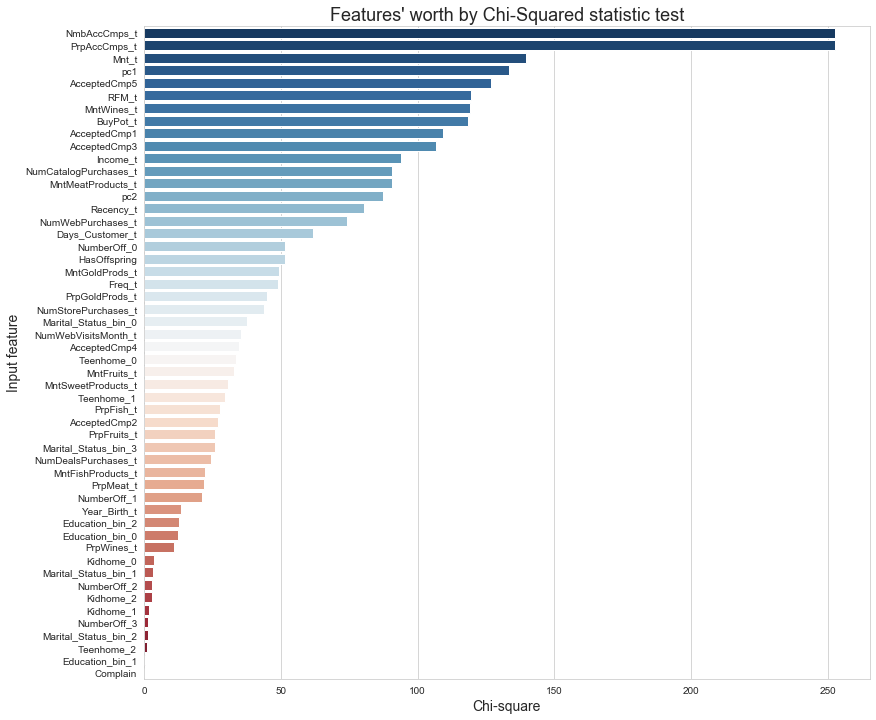

In [72]:
sns.set_style('whitegrid') 

plt.subplots(figsize=(13,12))
pal = sns.color_palette("RdBu_r", len(df_chisq_rank))
rank = df_chisq_rank['Chi-Squared'].argsort().argsort()  

sns.barplot(y=df_chisq_rank.index,x=df_chisq_rank['Chi-Squared'], palette=np.array(pal[::-1])[rank])
plt.title("Features' worth by Chi-Squared statistic test", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Chi-square", fontsize=14)

plt.show()

## **Balance training set**

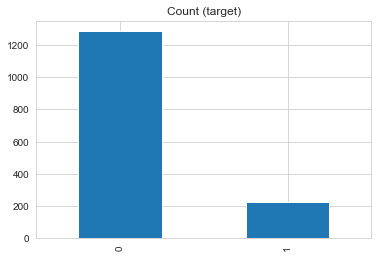

In [73]:
y_train.value_counts().plot(kind='bar', title='Count (target)');

#### Oversampling

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

y_train.value_counts().plot(kind='bar', title='Count (target)');

ModuleNotFoundError: No module named 'imblearn'

## Models

In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = scaler.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

LR = LogisticRegression()
LR.fit(X_train, y_train)

In [ ]:
y_pred = LR.predict(X_test)
print('ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

In [ ]:
from sklearn.naive_bayes import GaussianNB

Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

In [ ]:
y_pred = LR.predict(X_test)
print('ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

DNN

In [ ]:
from keras import models
from keras import layers
import tensorflow as tf

model = models.Sequential()
model.add(layers.Dense(5, activation='relu', input_dim=53))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(X_train, y_train, epochs=30)

In [ ]:
cnn_model = model
metrics = cnn_model.evaluate(X_test, y_test)
print("{}: {}".format(cnn_model.metrics_names[1], metrics[1]))

## Results

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)